In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [35]:
# This statement allow to display plot without asking to
%matplotlib inline

# Load data and browse data

In [28]:

#load data and browse data
churn=pd.read_csv('churn.csv')

In [29]:
#have a look at the data info
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [30]:
churn.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [31]:
churn.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [32]:
#check missing data
churn.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

# Explore

### numeric variable


In [33]:
churn.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct'],
      dtype='object')

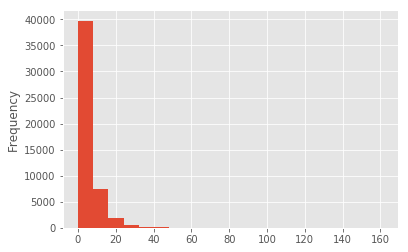

In [36]:
churn['avg_dist'].plot.hist(bins=20)

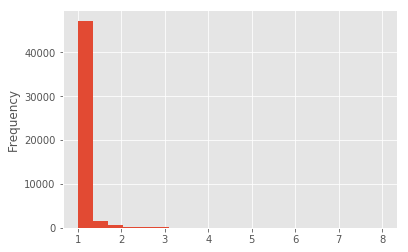

In [40]:
churn['avg_surge'].plot.hist(bins=20)

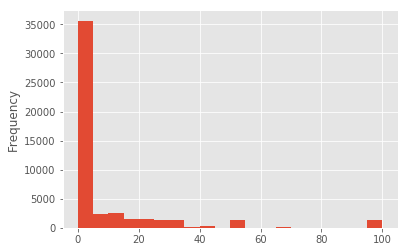

In [41]:
churn['surge_pct'].plot.hist(bins=20)

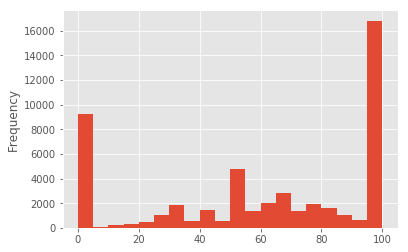

In [42]:
churn['weekday_pct'].plot.hist(bins=20)

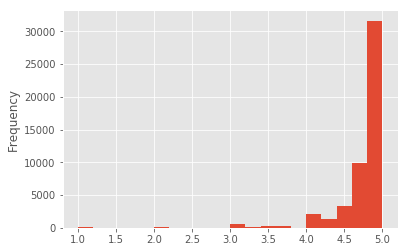

In [43]:
churn['avg_rating_by_driver'].plot.hist(bins=20)

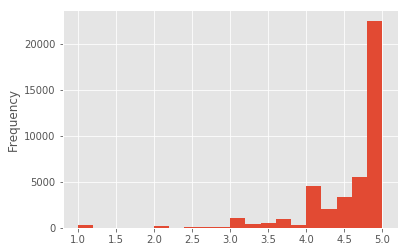

In [44]:
churn['avg_rating_of_driver'].plot.hist(bins=20)

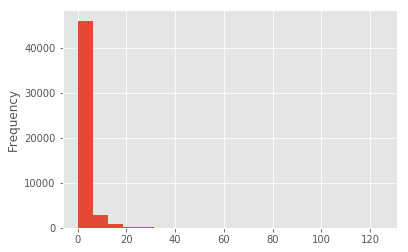

In [46]:
churn['trips_in_first_30_days'].plot.hist(bins=20)

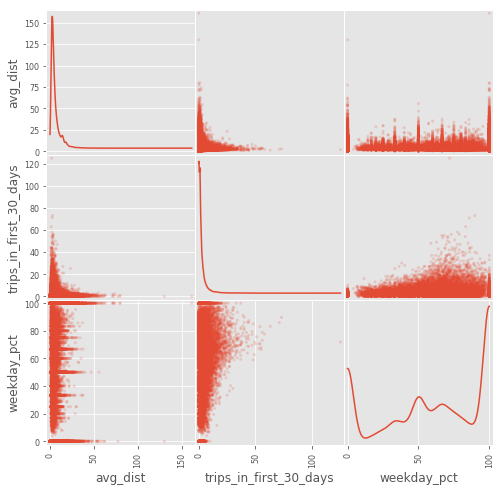

In [47]:
# Use scatter_matrix from Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(churn[[u'avg_dist', u'trips_in_first_30_days', u'weekday_pct']], 
               alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

### Categorical Variable

In [48]:
churn['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

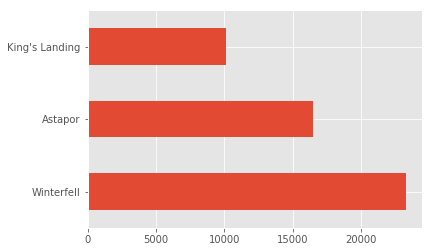

In [49]:
churn['city'].value_counts().plot.barh()

In [50]:
churn['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

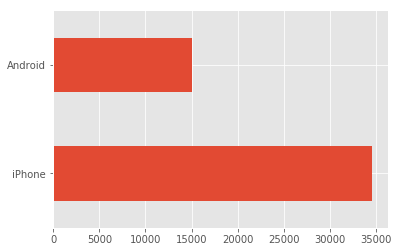

In [51]:
churn['phone'].value_counts().plot.barh()

In [52]:
churn['luxury_car_user'].value_counts()

False    31146
True     18854
Name: luxury_car_user, dtype: int64

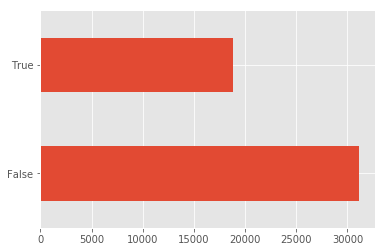

In [53]:
churn['luxury_car_user'].value_counts().plot.barh()

# Clean Data

### option 1: drop all missing data

In [54]:
churn.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

In [55]:
df1=churn.dropna(axis=0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
luxury_car_user           41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [56]:
df1.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


### option 2: Imputation

In [57]:
#make a copy of the raw data cause I don't want to mess up my raw data
df2=churn.copy()

In [58]:
df2['phone']=df2['phone'].fillna('no-phone')

In [59]:
# Fill missing values with median
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].median())
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].median())

In [60]:
df2.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
luxury_car_user           0
weekday_pct               0
dtype: int64

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [62]:
df2.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [63]:
#we adopt option2

# Transform Data

In [65]:
#experiment
date='2014-10-02'
date2=pd.to_datetime(date)
print(date2.dayofweek)

3


In [66]:
# convert time-series information to datetime data type
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])
df2['signup_date'] = pd.to_datetime(df2['signup_date'])

In [68]:
# There might be some signal from day of week when a user signed up Uber, so let's create a column for that
df2['signup_dow'] = df2['signup_date'].apply(lambda x: x.dayofweek)

In [69]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


### Converting Categorical Data

In [70]:
df2['luxury_car_user']=df2['luxury_car_user'].astype(int)

In [71]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


In [72]:
col_category = ['signup_dow', 'city', 'phone']

In [73]:
df_dummies = pd.get_dummies(df2[col_category], columns=col_category)

In [75]:
df_dummies.head()

,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no-phone
0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,1,0,0


In [76]:
df2 = df2.join(df_dummies)

In [77]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no-phone
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,0,1,0,0,1,0,0,1,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0,0,0,0,1,0,0,0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0,1,0,0,0,1,0,0,1,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0,0,0,0,0,0,1,1,0,0


In [78]:
df2.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'signup_dow', 'signup_dow_0', 'signup_dow_1', 'signup_dow_2',
       'signup_dow_3', 'signup_dow_4', 'signup_dow_5', 'signup_dow_6',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'phone_no-phone'],
      dtype='object')

# Define Outcome

In [79]:
# Define churn: users did not take a trip during last 30 days, i.e. last trip date is earlier than 2014-06-01
df2['churn'] = (df2.last_trip_date < pd.to_datetime('2014-06-01')) * 1
df2['active'] = (df2.last_trip_date >= pd.to_datetime('2014-06-01')) * 1

df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no-phone,churn,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,1,0,0,1,0,0,1,0,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0,0,1,0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0,0,1,0,0,0,1,0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0,0,0,1,0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0,0,0,0,1,1,0,0,1,0


In [80]:
df2['churn'].mean()

0.62392000000000003

In [81]:
df2['active'].mean()

0.37608000000000003

# EDA with label

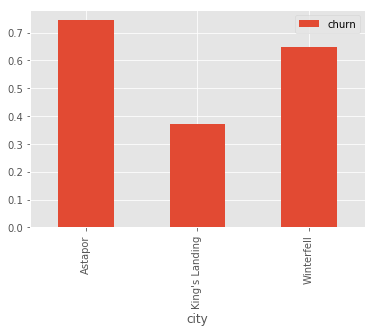

In [82]:
df2[['city', 'churn']].groupby(['city']).mean().plot.bar()

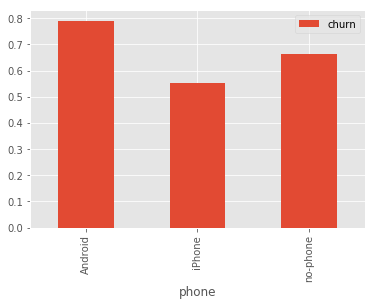

In [84]:
df2[['phone','churn']].groupby(['phone']).mean().plot.bar()

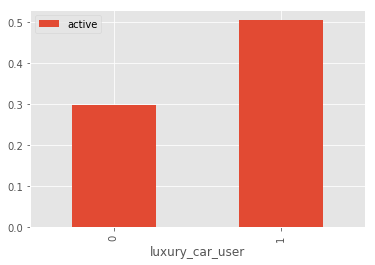

In [85]:
df2[['luxury_car_user', 'active']].groupby(['luxury_car_user']).mean().plot.bar()

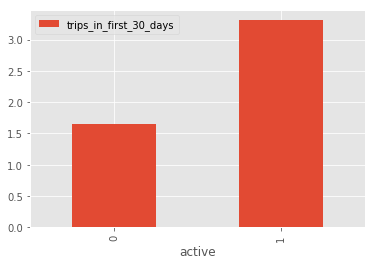

In [87]:
df2[['trips_in_first_30_days', 'active']].groupby(['active']).mean().plot.bar()

In [89]:
is_active = df2['active'] == 1

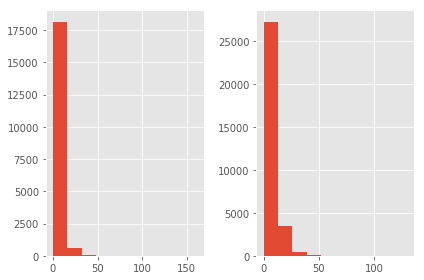

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(df2[is_active]['avg_dist'].values)
axes[1].hist(df2[~is_active]['avg_dist'].values)
fig.tight_layout()
plt.show()

# Save to CSV

In [96]:
cleaned_data_csv = 'cleaned_data.csv'
df2.to_csv(cleaned_data_csv, index=False)